# Inflação e dinheiro sujo

In [1]:
import matplotlib.pyplot as plt

from utils.read_excel import load_excel as load
from utils.get_columns import get_columns as get_columns

In [2]:
# Lê os dfs
df_inflacao = load('data/inflacao.csv', 'csv')
df_money = load('data/Big_Black_Money_Dataset.csv', 'csv')

# Inflação

In [3]:
df_inflacao.head(20)

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo,consolidado_ano
0,1980-01,1980,1,198001,6.62,6.62,0.00,0.0,0.0,0.0,...,4.48,4.70,4.70,0.0,0.0,0.0,0.0,0.0,2932.8,False
1,1980-02,1980,2,198002,4.62,11.54,0.00,0.0,0.0,0.0,...,7.83,9.53,14.23,0.0,0.0,0.0,0.0,0.0,2932.8,False
2,1980-03,1980,3,198003,6.04,18.27,0.00,0.0,0.0,0.0,...,12.17,12.80,27.03,0.0,0.0,0.0,0.0,0.0,2932.8,False
3,1980-04,1980,4,198004,5.29,24.53,0.00,0.0,0.0,0.0,...,16.10,3.13,30.16,0.0,0.0,0.0,0.0,0.0,2932.8,False
4,1980-05,1980,5,198005,5.70,31.63,0.00,0.0,0.0,0.0,...,22.62,4.86,35.02,0.0,0.0,0.0,0.0,0.0,4149.6,False
5,1980-06,1980,6,198006,5.31,38.61,0.00,0.0,0.0,0.0,...,27.64,5.73,40.75,0.0,0.0,0.0,0.0,0.0,4149.6,False
6,1980-07,1980,7,198007,5.55,46.30,0.00,0.0,0.0,0.0,...,32.88,6.33,47.08,0.0,0.0,0.0,0.0,0.0,4149.6,False
7,1980-08,1980,8,198008,4.95,53.53,0.00,0.0,0.0,0.0,...,38.34,10.28,57.36,0.0,0.0,0.0,0.0,0.0,4149.6,False
8,1980-09,1980,9,198009,4.23,60.03,0.00,0.0,0.0,0.0,...,44.49,8.02,65.38,0.0,0.0,0.0,0.0,0.0,4149.6,False
9,1980-10,1980,10,198010,9.48,75.20,0.00,0.0,0.0,0.0,...,51.27,3.10,68.48,0.0,0.0,0.0,0.0,0.0,4149.6,False


In [40]:
# Filtro e análise descritiva
df_inflacao_filter = df_inflacao[df_inflacao['ano'] >= 1995]  # Filtro para o plano real em jul de 1994 (vamos considerar como antes de 1995 outliers)
df_inflacao_filter.describe()

,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,inpc_variacao,...,ipc_fipe_variacao,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.00000,341.000000,341.000000,341.000000,341.000000
mean,2008.712610,6.448680,200877.709677,0.554106,3.796217,11.581525,0.417977,2.847097,5.196891,0.560469,...,0.510704,3.333226,0.683695,4.861935,0.698827,4.77651,12.049150,15.848035,6.743900,527.038123
std,8.217599,3.461703,821.677671,0.469024,3.073915,44.413852,0.417867,2.460683,3.565881,0.500202,...,0.536411,3.086807,0.744284,4.353987,0.779681,4.61566,7.059275,10.812149,10.317617,360.607202
min,1995.000000,1.000000,199501.000000,-0.680000,-0.160000,1.650000,-0.730000,0.000000,0.000000,-0.600000,...,-1.000000,-1.790000,-0.500000,0.310000,0.000000,0.00000,0.000000,1.900000,-80.010000,70.000000
25%,2002.000000,3.000000,200202.000000,0.280000,1.650000,4.530000,0.090000,0.760000,2.970000,0.240000,...,0.190000,1.180000,0.270000,1.730000,0.280000,1.55000,7.250000,9.540000,3.770000,180.000000
50%,2009.000000,6.000000,200903.000000,0.470000,3.140000,6.150000,0.380000,2.490000,5.470000,0.490000,...,0.410000,2.710000,0.490000,4.130000,0.480000,3.90000,11.750000,13.650000,6.460000,465.000000
75%,2016.000000,9.000000,201604.000000,0.750000,5.050000,7.870000,0.630000,4.360000,6.930000,0.770000,...,0.720000,4.580000,0.860000,6.510000,0.840000,6.48000,16.500000,18.970000,10.100000,880.000000
max,2023.000000,12.000000,202305.000000,3.020000,22.410000,631.540000,3.050000,11.990000,17.240000,3.390000,...,3.720000,21.060000,8.770000,27.960000,9.380000,32.74000,45.000000,85.470000,39.050000,1320.000000


Text(0, 0.5, 'IPCA Acumulado Ano')

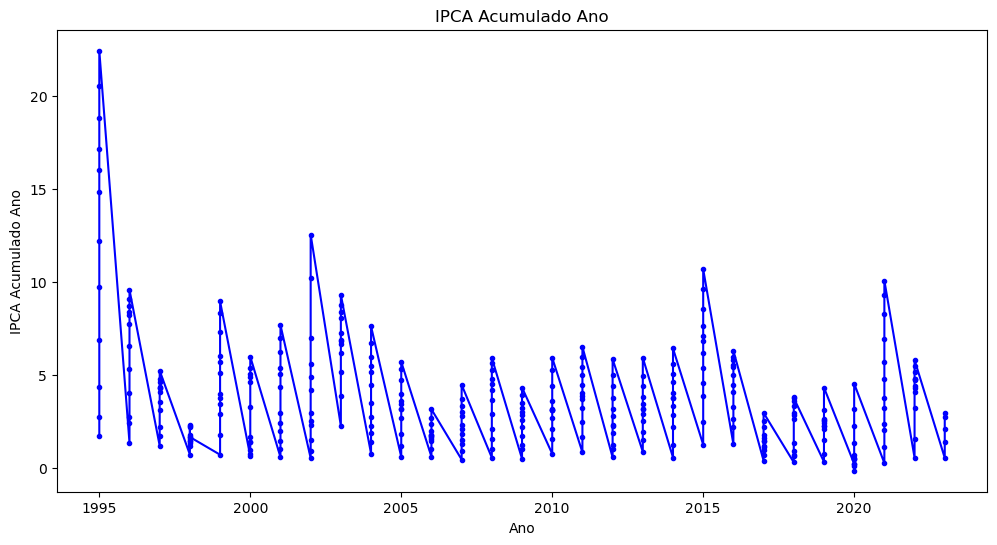

In [45]:
# Gráfico IPCA Acumulado no Ano
x = df_inflacao_filter['ano']
y = df_inflacao_filter['ipca_acumulado_ano']

plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', color='b', markersize=3)
plt.title('IPCA Acumulado Ano')
plt.xlabel('Ano')
plt.ylabel('IPCA Acumulado Ano')

Text(0, 0.5, 'Salário')

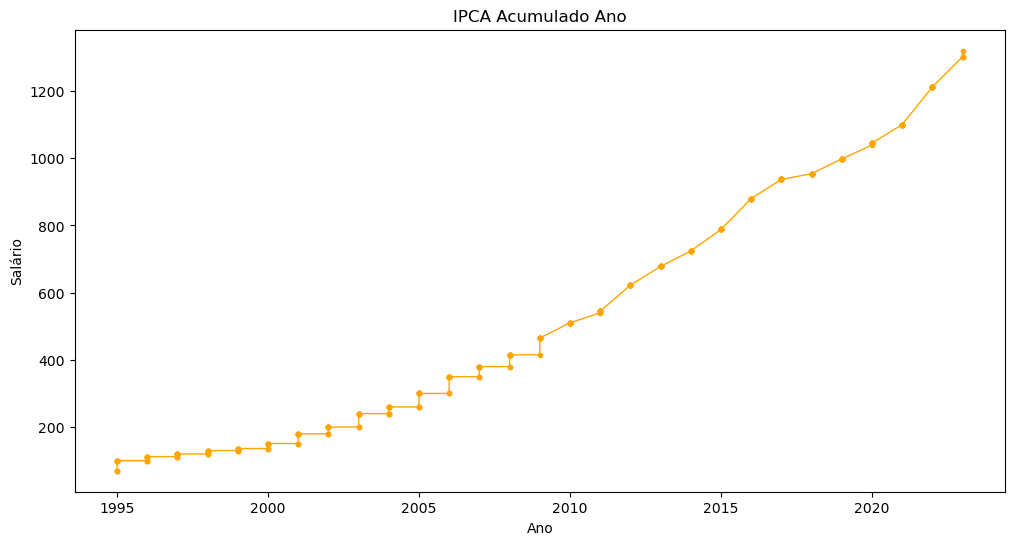

In [46]:
x = df_inflacao_filter['ano']
y = df_inflacao_filter['salario_minimo']

plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', color='orange', linewidth=1, markersize=3)
plt.title('IPCA Acumulado Ano')
plt.xlabel('Ano')
plt.ylabel('Salário')